

# Project: Investigate a Dataset (medical appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### dataset discription
- this dataset is about medical appointments and whether the patient came or not that is specified by the no_show         columnwhe it is no it means that the patient came 
- it include some features about the patient like if the patient is diabitic or not suffer or no from which               neighbourhood and is alcoholic or not 

### questions to answer
- is there any correlation between age and numbers of appointments ?
- is there any feature that may affect whether or not the patient would come to the appointment ?
- is there any correlation between alcohol and other features ?

In [2]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# data loading 
df = pd.read_csv('noshowappointments_kagglev2_may_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- columns data types are good for all except for patientid and appointmentid it is better to be object
  but i will drop them any way as they have no use for addressing any question her.
- Scholarship,Hipertension,Diabetes,Alcoholism,Handcap and SMS_received are all int i would like to keep them like that   as it well be more representative to compare by proportion and its easy to do that just by obtaining the mean 
- its better to make headers lower case
- there is no duplicated row in the data and no null

### Data Cleaning (modifying headers and droping patientid and appointmentid )

In [7]:
df.rename (columns=lambda x:x.strip().lower().replace('-','_'),inplace=True)
df.drop(['patientid','appointmentid'],axis=1,inplace=True)

In [8]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
### is there any correlation between age and numbers of appointments?

Text(0.5,1,'age_distribution')

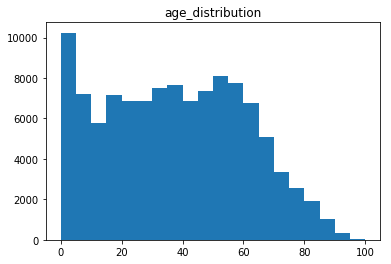

In [9]:
plt.hist(df['age'],bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.title('age_distribution')

- it sounds that more patients come at the age of from 0 to 5 than any other age and after that comes patient at the age   from 50 to 55

### is there any feature that may affect whether or not the patient would come to the appointment?

In [10]:
no_show_means_df=df.groupby('no_show').mean()
no_show_means_df

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,,,
No,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
Yes,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


Text(0.5,1,'proportion_of_hipertension_per_attendance')

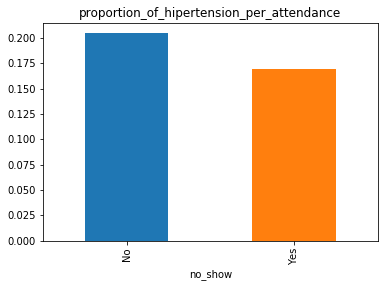

In [11]:
no_show_means_df['hipertension'].plot(kind="bar")
plt.title('proportion_of_hipertension_per_attendance')

it sounds that patients with hipertension tend to come more

Text(0.5,1,'proportion_of_diabetes_per_attendance')

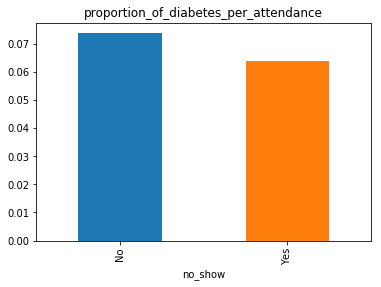

In [12]:
no_show_means_df['diabetes'].plot(kind='bar')
plt.title('proportion_of_diabetes_per_attendance')

it sounds that patients with diabetes tend to come more

Text(0.5,1,'proportion_of_sms_receiving_per_attendance')

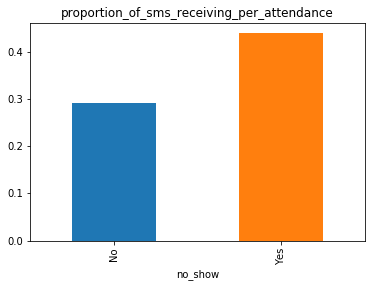

In [13]:
no_show_means_df['sms_received'].plot(kind='bar')
plt.title('proportion_of_sms_receiving_per_attendance')

sms_receiveing is higher in case of patients who do not come

### is there any correlation between alcohol and other features ?

In [14]:
alcohol_means_df=df.groupby('alcoholism').mean()
alcohol_means_df

,age,scholarship,hipertension,diabetes,handcap,sms_received
alcoholism,,,,,,
0,36.69681,0.096420,0.191048,0.07102,0.022115,0.323187
1,49.59375,0.157143,0.394940,0.09881,0.026488,0.252083


Text(0.5,1,'proportion_of_hipertension_per_alcoholism')

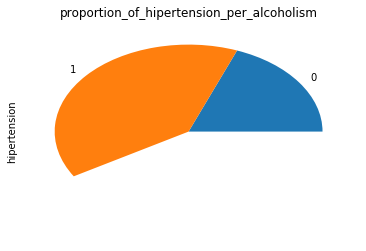

In [15]:
alcohol_means_df['hipertension'].plot(kind='pie')
plt.title('proportion_of_hipertension_per_alcoholism')

Text(0.5,1,'proportion_of_diabetes_per_alcoholism')

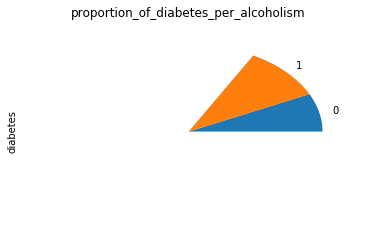

In [16]:
alcohol_means_df['diabetes'].plot(kind='pie')
plt.title('proportion_of_diabetes_per_alcoholism')

it sounds that alcoholic patients have more proportion of diabetes and hipertension

<a id='conclusions'></a>
## Conclusions

it sounds that
- more patients come at the age of from 0 to 5 than any other age and after that comes patient at the age from 50 to 55.
- patients with hipertension tend to come more to there appointments.
- patients with diabetes tend to come more to there appointments.
- sms_receiveing is higher in case of patients who do not come.
- it sounds that alcoholic patients have more proportion of diabetes and hipertension.
- the data is limited in columns there is no quantitative data but age to make a good scattered plot with.
- the number or rows is sufficient.